## LogisticRegression

### SGD

In [4]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_full.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris[:3, :])  # Display first 3 rows
print(iris.shape)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
(100, 5)


In [5]:
X = iris[:, :4]
y = iris[:, 4]

N = X.shape[0]  # 100
indices = np.random.permutation(N)  # Shuffle indices
X = X[indices]
y = y[indices]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

print("X_b", X_b.shape)
print("y", y.shape)
print("N", N)

X_b (100, 5)
y (100,)
N 100


In [6]:
X_b[:10]

array([[1. , 6.7, 3. , 5. , 1.7],
       [1. , 5.7, 3. , 4.2, 1.2],
       [1. , 5.6, 2.7, 4.2, 1.3],
       [1. , 6.7, 3.1, 4.7, 1.5],
       [1. , 5.4, 3. , 4.5, 1.5],
       [1. , 5.3, 3.7, 1.5, 0.2],
       [1. , 5.7, 2.6, 3.5, 1. ],
       [1. , 5.1, 3.4, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4.7, 3.2, 1.6, 0.2]])

In [7]:
y[:10]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0.])

In [8]:
def sigmoid_sgd(z):
    return 1 / (1 + np.exp(-z))


def predict_sgd(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid_sgd(z)
    return y_hat


def compute_loss_sgd(y_hat, y):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


def compute_gradient_sgd(x, y_hat, y):
    return x * (y_hat - y)


def update_sgd(theta, lr, gradient):
    return theta - lr * gradient

In [ ]:
lr = 0.01
n_epochs = 100

theta = np.array([0.1, 0.3, 0.1, 0.2, -0.1])  # for 4 features + intercept(bias)
losses = []
preds = []
accuracies = []

for epoch in range(n_epochs):
    for i in range(N):
        xi = X_b[i]
        yi = y[i]

        y_hat = predict_sgd(xi, theta)

        loss = compute_loss_sgd(y_hat, yi)
        losses.append(loss)
        gradient = compute_gradient_sgd(xi, y_hat, yi)
        theta = update_sgd(theta, lr, gradient)

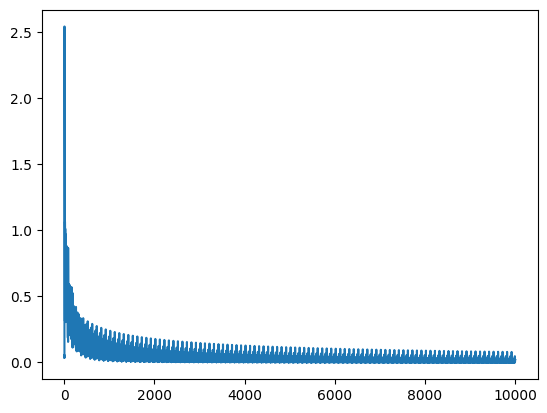

In [11]:
plt.plot(losses)
plt.show()

In [12]:
theta

array([-0.30535785, -0.53820173, -2.04801521,  3.10403472,  1.21930385])

In [29]:
# compute accuracy
preds = []
y_hats = []
for i in range(0, N):
    xi = X_b[i : i + 1]
    yi = y[i : i + 1]

    # round to get class labels 0 or 1
    y_hat = predict_sgd(xi, theta)
    y_hats.append(float(y_hat[0]))
    preds.append(float(y_hat[0].round()))

acc = (preds == y).mean()
print("Accuracy:", acc)

Accuracy: 1.0


In [31]:
y_hats[:10]

[0.9994676277259242,
 0.9931928888564884,
 0.996899579184583,
 0.9978874870693022,
 0.9984083945169269,
 0.0029132442300117997,
 0.9672475940901436,
 0.0059788778430920715,
 0.0041613355088325745,
 0.015094156705608002]

In [30]:
preds[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]

In [32]:
y[:10]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0.])

### Minibatch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_full.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris[:3, :])  # Display first 3 rows
print(iris.shape)
X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
m = X.shape[0]

print("X_b", X_b.shape)
print("y", y.shape)
print("m", m)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
(100, 5)
X_b (100, 5)
y (100,)
m 100


In [ ]:
def sigmoid_minibatch(z):
    return 1 / (1 + np.exp(-z))


def predict_minibatch(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid_minibatch(z)
    return y_hat


def compute_loss_minibatch(y_hat, y):
    return -(y.T.dot(np.log(y_hat)) + (1 - y).T.dot(np.log(1 - y_hat)))


def compute_gradient_minibatch(xi, y_hat, yi):
    m = yi.size
    grad = np.dot(xi.T, (y_hat - yi)) / m
    return grad


def update_gradient_minibatch(theta, lr, gradient):
    return theta - lr * gradient

In [ ]:
# training hypermeter
lr = 0.01
num_epochs = 100
minibatch_size = 32

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])  # for 4 features + intercept(bias)

losses = []
accs = []

for i in range(num_epochs):
    # Shuffle the data at the beginning of each epoch
    indices = np.random.permutation(m)
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]

    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i : i + minibatch_size]
        yi = y_shuffled[i : i + minibatch_size]

        y_hat = predict_minibatch(xi, theta)

        loss = compute_loss_minibatch(y_hat, yi)
        losses.append(loss)

        gradient = compute_gradient_minibatch(xi, y_hat, yi)

        theta = update_gradient_minibatch(theta, lr, gradient)

        y_preds = predict_minibatch(xi, theta).round()
        acc = (y_preds == yi).mean()
        accs.append(acc)

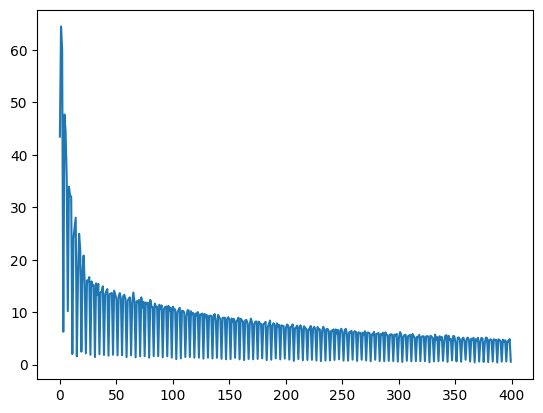

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

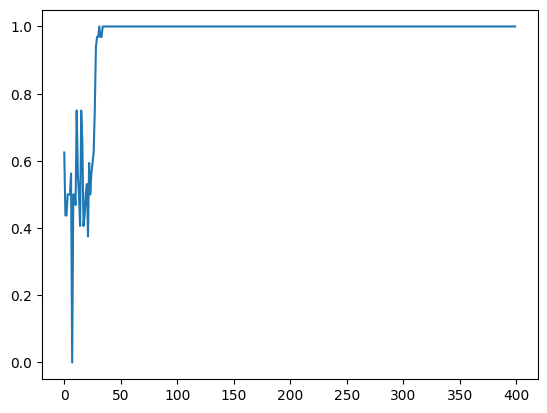

In [24]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.show()

### Batch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_full.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris[:3, :])  # Display first 3 rows
print(iris.shape)
X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
# X_b = np.concatenate((intercept, X), axis=1)
X_b = np.hstack([intercept, X])
print("X_b = \n", X_b[:5])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
(100, 5)
X_b = 
 [[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]


In [ ]:
# shuffle
indices = np.arange(X_b.shape[0])
np.random.shuffle(indices)

X = X_b[indices]
y = y[indices]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [ ]:
X[:20]

array([[1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5.4, 3.4, 1.5, 0.4],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 5.5, 2.5, 4. , 1.3],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 5.5, 2.3, 4. , 1.3],
       [1. , 5.6, 2.5, 3.9, 1.1],
       [1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5.7, 3. , 4.2, 1.2],
       [1. , 4.5, 2.3, 1.3, 0.3],
       [1. , 6. , 3.4, 4.5, 1.6],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5.2, 4.1, 1.5, 0.1],
       [1. , 4.7, 3.2, 1.3, 0.2]])

In [33]:
def sigmoid_batch(z):
    return 1 / (1 + np.exp(-z))


def predict_batch(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid_batch(z)
    return y_hat


def compute_loss_batch(y_hat, y):  # mean() is "/ N"
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()


def compute_gradient_batch(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

In [34]:
# training
lr = 0.01
n_epochs = 2000
theta = np.array([0.01, 0.05, 0.01, 0.5, -0.1])
# theta = np.array([10, 0.05, 10, 0.5, -0.1])
losses = []
accs = []

for epoch in range(n_epochs):
    y_hat = predict_batch(X, theta)

    loss = compute_loss_batch(y_hat, y)
    losses.append(loss)

    gradient = compute_gradient_batch(X, y_hat, y)

    theta = theta - lr * gradient

    y_preds = predict_batch(X, theta).round()
    acc = (y_preds == y).mean()
    accs.append(acc)

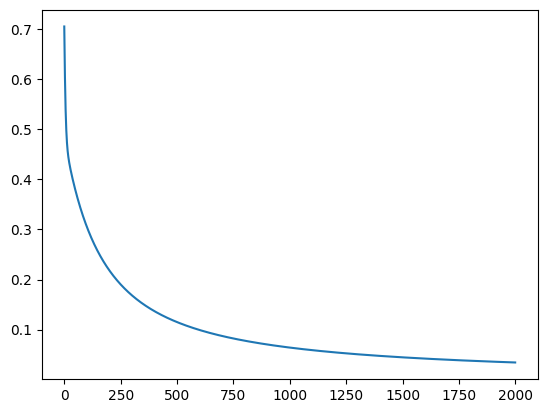

In [35]:
# show figures
plt.plot(losses)
plt.show()

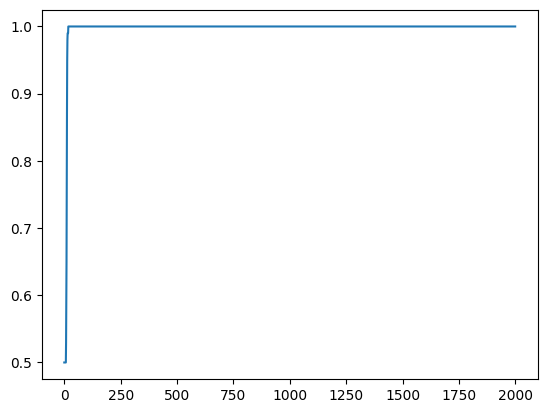

In [36]:
plt.plot(accs)
plt.show()

In [45]:
y_preds = predict_batch(X, theta).round()
print(y_preds[:24])
print(y[:24])

[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]


### Batch Normalization

In [64]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_full.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris[:3, :])  # Display first 3 rows
print(iris.shape)
X = iris[:, :4]
y = iris[:, 4]

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
(100, 5)


In [65]:
# Normalize
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X - mini) / (maxi - mini)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
# X_b = np.hstack([intercept, X])
print("X_b = \n", X_b[:5])

X_b = 
 [[1.         0.72463768 0.49275362 0.1884058  0.01449275]
 [1.         0.69565217 0.42028986 0.1884058  0.01449275]
 [1.         0.66666667 0.44927536 0.17391304 0.01449275]
 [1.         0.65217391 0.43478261 0.20289855 0.01449275]
 [1.         0.71014493 0.50724638 0.1884058  0.01449275]]


In [66]:
# shuffle
inds = np.arange(X_b.shape[0])
np.random.shuffle(inds)

X = X_b[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [67]:
def sigmoid_batch_norm(z):
    return 1 / (1 + np.exp(-z))


def compute_loss_batch_norm(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def predict_batch_norm(X, theta):
    y_hat = sigmoid_batch_norm(np.dot(X, theta))
    return y_hat


def compute_gradient_batch_norm(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

In [ ]:
# training
lr = 0.01
num_iter = 50000

theta = np.array([0.01, 0.05, 0.01, 0.5, -0.1])
# theta = np.array([10, 0.05, 10, 0.5, -0.1])
losses = []
accs = []

for i in range(num_iter):
    # predict z
    y_hat = predict_batch_norm(X, theta)

    # compute loss
    loss = compute_loss_batch_norm(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient_batch_norm(X, y_hat, y)

    theta -= lr * gradient
    # print('new theta: ', theta)

    # for debug
    if i % 10 == 0:
        # loss
        losses.append(loss)

        # accuracy for training
        preds = predict_batch_norm(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)

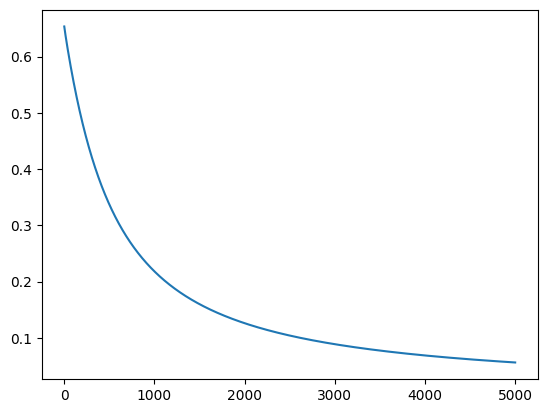

In [69]:
# show figures
plt.plot(losses)
plt.show()

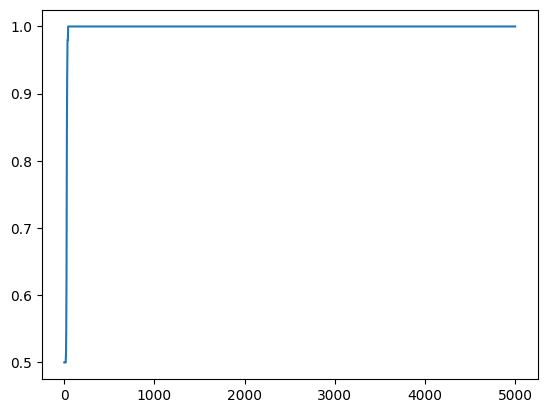

In [70]:
plt.plot(accs)
plt.show()

In [ ]:
preds = predict_batch_norm(X, theta).round()
print(preds)
print(y)

[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0.]


### Batch Tanh

In [81]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_full.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris[:3, :])  # Display first 3 rows
print(iris.shape)
X = iris[:, :4]
y = iris[:, 4]

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
(100, 5)


In [82]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print("X = \n", X[:5])

X = 
 [[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]


In [83]:
# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

In [ ]:
def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


def compute_loss_tanh(y_hat, y):
    h_scale = (y_hat + 1) / 2
    return (-y * np.log(h_scale) - (1 - y) * np.log(1 - h_scale)).mean()


def predict_tanh(X, theta):
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat


def compute_gradient_tanh(X, y_hat, y):
    return np.dot(X.T, (y_hat + 1 - 2 * y)) / y.size

In [ ]:
lr = 0.01
num_iter = 500

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])
losses = []
accs = []

for i in range(num_iter):
    # predict output
    y_hat = predict_tanh(X, theta)

    # compute loss
    loss = compute_loss_tanh(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient_tanh(X, y_hat, y)

    # update
    theta -= lr * gradient

    # for debug
    losses.append(loss)

    # accuracy for training
    preds = predict_tanh(X, theta).round() / 2 + 0.5
    acc = (preds == y).mean()
    accs.append(acc)

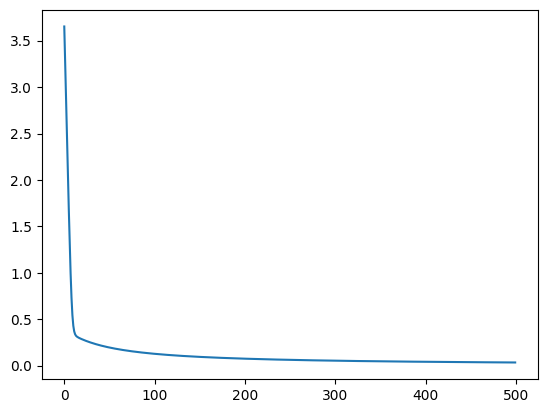

In [86]:
# show figures
plt.plot(losses)
plt.show()

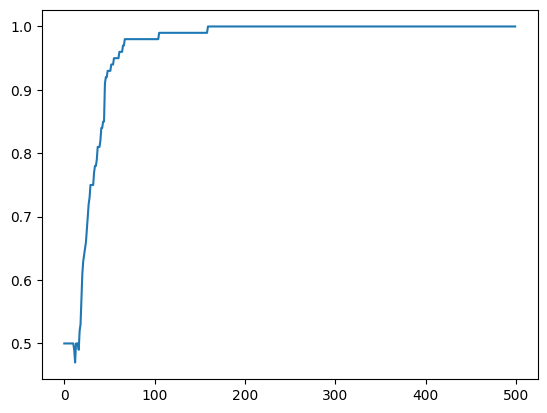

In [87]:
plt.plot(accs)
plt.show()

In [ ]:
preds = predict_tanh(X, theta).round() / 2 + 0.5
print(preds)
print(y)

[0.5 0.5 1.  0.5 1.  0.5 1.  1.  1.  0.5 1.  0.5 0.5 0.5 0.5 0.5 1.  1.
 0.5 0.5 1.  1.  0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1.  0.5 0.5 0.5 0.5 1.
 1.  0.5 0.5 0.5 1.  0.5 1.  1.  0.5 1.  0.5 0.5 1.  0.5 1.  0.5 0.5 1.
 0.5 0.5 1.  1.  1.  1.  0.5 1.  0.5 0.5 0.5 1.  1.  0.5 0.5 1.  0.5 1.
 0.5 0.5 1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  0.5 0.5 0.5 1.  0.5 0.5]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0.]


[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0.]
[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0.]
